In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df =  pd.read_excel('Dhaka Rent.xlsx')

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.shape

(60, 2)

Text(0.5, 1.0, 'dhaka rent table')

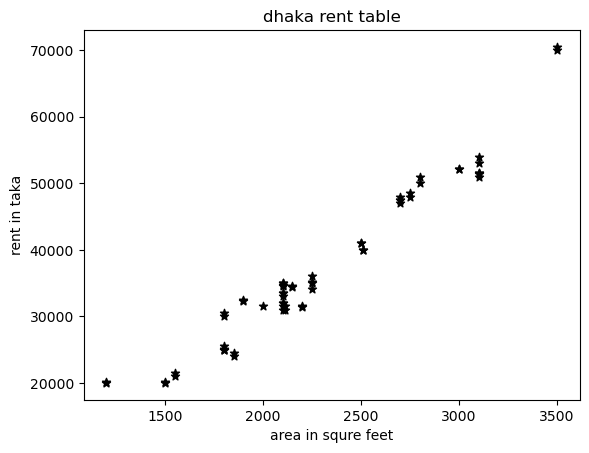

In [5]:
plt.scatter(df.area, df.rent, color = 'black', marker = '*')
plt.xlabel('area in squre feet')
plt.ylabel('rent in taka')
plt.title('dhaka rent table')

In [6]:
x = df.drop('rent', axis = 1)
y = df[['rent']]

In [7]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [8]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [9]:
y.shape

(60, 1)

In [10]:
x.mean()

area    2289.0
dtype: float64

In [11]:
y.mean()

rent    37269.166667
dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, test = train_test_split(df, test_size=.25)

In [14]:
train.shape

(45, 2)

In [15]:
test.shape

(15, 2)

In [16]:
train.head()

,area,rent
55,3100,54000
14,2250,34100
11,2100,32000
8,2700,48000
4,3000,52100


# seperate

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25, random_state=0)

In [18]:
xtrain.head()

,area
43,2510
49,2700
7,1850
14,2250
32,2500


In [19]:
ytrain.head()

,rent
43,40000
49,47500
7,24500
14,34100
32,41100


# linear regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [23]:
m = lr.coef_
m

array([[20.87611375]])

In [24]:
c = lr.intercept_
c

array([-10452.20563527])

In [25]:
yp = (m*1800)+c
yp

array([[27124.79911315]])

In [26]:
yp = (m*2200)+c
yp

array([[35475.2446128]])

In [27]:
lr.predict([[2200]])

array([[35475.2446128]])

In [28]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [29]:
df['predicted_rent'] = lr.predict(x)
df.head()

,area,rent,predicted_rent
0,2000,31500,31300.021863
1,2100,35000,33387.633238
2,2500,41050,41738.078738
3,2250,36100,36519.050300
4,3000,52100,52176.135612


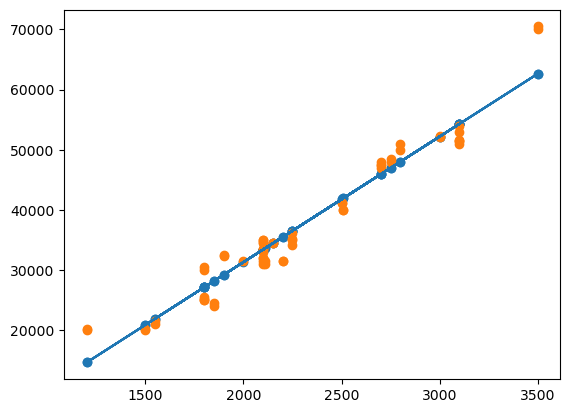

In [30]:
plt.plot(x, df[['predicted_rent']])
plt.scatter(x, df[['predicted_rent']])
plt.scatter(x, df[['rent']])

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
mse = mean_squared_error(ytest, lr.predict(xtest))
mae = mean_absolute_error(ytest, lr.predict(xtest))

In [33]:
mae

1819.0192225841306

In [34]:
mse

7335043.265951889

In [35]:
lr.score(xtest, ytest)

0.9403542244869332

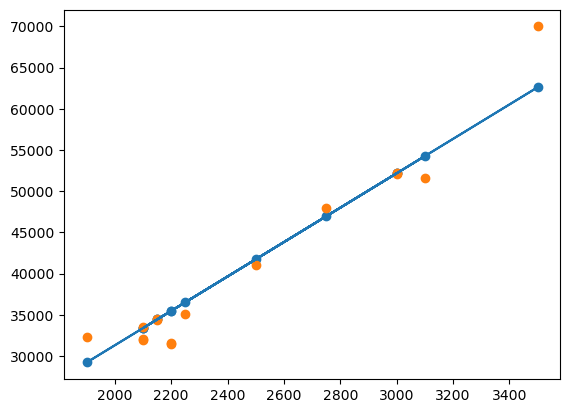

In [36]:
plt.plot(xtest, lr.predict(xtest))      
plt.scatter(xtest, lr.predict(xtest))
plt.scatter(xtest, ytest)